In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as pil
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

### Get Mnist Datas

In [2]:
mnist = fetch_mldata('MNIST original')
print("total data : {}".format(len(mnist.data)))
print("total class : {}".format(len(np.unique(mnist.target))))

total data : 70000
total class : 10


### Split test data & training data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.8, random_state=0)
print("Training Data : {}".format(len(X_train)))
print("Test Data : {}".format(len(X_test)))

Training Data : 14000
Test Data : 56000


### Display Datas

In [5]:
def image(data):
        return data.reshape((28, 28))
    
def display_datas(N, M=10):
    fig = plt.figure(figsize=(10, 10/(10/N)))
    plt.subplots_adjust()
    for i in range(N):
        for j in range(M):
            k = i*M+j
            ax = fig.add_subplot(N, M, i*M+j+1)
            ax.imshow(image(X_train[k]), cmap=plt.cm.bone)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            plt.title(int(y_train[k])) # add target on title 
    plt.tight_layout()
    plt.show()

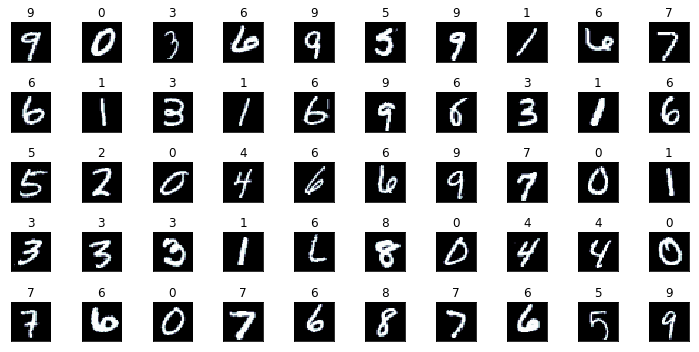

In [6]:
display_datas(5)

### Train SVM

In [7]:
%time svc_model = SVC(kernel='linear').fit(X_train, y_train)

CPU times: user 23 s, sys: 125 ms, total: 23.2 s
Wall time: 23.2 s


In [8]:
%time y_pred = svc_model.predict(X_test[:10000])
print(accuracy_score(y_test[:10000], y_pred))

CPU times: user 25.7 s, sys: 62 ms, total: 25.8 s
Wall time: 25.8 s
0.9097


In [9]:
accuracy_score(y_test[:10000], y_pred)

0.90969999999999995

### Predict Mnist Data Set

In [10]:
def display_datas2(k):
    fig = plt.figure(figsize=(10, 1))
    plt.subplots_adjust()
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(image(mnist.data[k]), cmap=plt.cm.bone)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.tight_layout()
    plt.show()
    
    result = svc_model.predict(mnist.data[k].reshape(1, -1))
    result_str = "data : {} / predict : {}".format(int(mnist.target[k]), int(result))
    print(result_str)

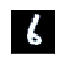

data : 6 / predict : 6


In [25]:
display_datas2(66102)